In [1]:
# --------------------- EDA EDA – Rooftop Solar Potential (Accra) ----------------------

In [2]:
# --------------------- import necessary library ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# --------------------- Load datasets ----------------------
df = pd.read_csv("../original_datasets/stlucia_roof_sorlar_potential.csv")

print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Shape: (3524, 15)
Columns: ['OBJECTID', 'uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor', 'Unit_installation_price', 'Date_added', 'Comment', 'aoi']


In [4]:
df.isna().sum()

OBJECTID                         0
uuid                             0
City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height      854
Estimated_capacity_factor       44
Unit_installation_price       3524
Date_added                       0
Comment                       3524
aoi                              0
dtype: int64

In [5]:
df.drop(['OBJECTID', 'uuid', 'Comment', 'Date_added', 'aoi','Unit_installation_price'] , axis=1, inplace=True)

In [6]:
# --------------------- columns after drop  ----------------------
print("Columns:", df.columns.tolist())
print(df.shape)

Columns: ['City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']
(3524, 9)


In [7]:
# ------------------ Missing value ----------------------
df.isna().sum()


City                            0
Surface_area                    0
Potential_installable_area      0
Peak_installable_capacity       0
Energy_potential_per_year       0
Assumed_building_type           0
Estimated_tilt                  0
Estimated_building_height     854
Estimated_capacity_factor      44
dtype: int64

In [8]:
# ------------------ Data Type ----------------------
df.dtypes

City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     float64
Estimated_capacity_factor     float64
dtype: object

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Columns:", numeric_cols.tolist())

Numeric Columns: ['Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']


In [10]:
df[numeric_cols].describe()

,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
count,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,2670.000000,3480.000000
mean,111.831825,61.566864,11.944004,17184.332528,23.081192,7.100045,1426.064026
std,111.837404,78.006276,15.134450,22401.595378,5.402760,5.445082,90.066286
min,3.630000,0.000000,0.000000,0.000000,0.000000,2.000000,1055.000000
25%,49.365000,21.160000,4.107500,5855.412354,20.860001,3.230000,1366.275000
50%,87.400002,44.455000,8.620000,12284.329590,22.900000,4.975000,1431.215000
75%,141.502499,78.775003,15.280000,21902.493164,24.950001,8.940000,1490.602500
max,1963.800049,1395.979980,270.820007,425999.218750,49.619999,24.740000,1638.000000


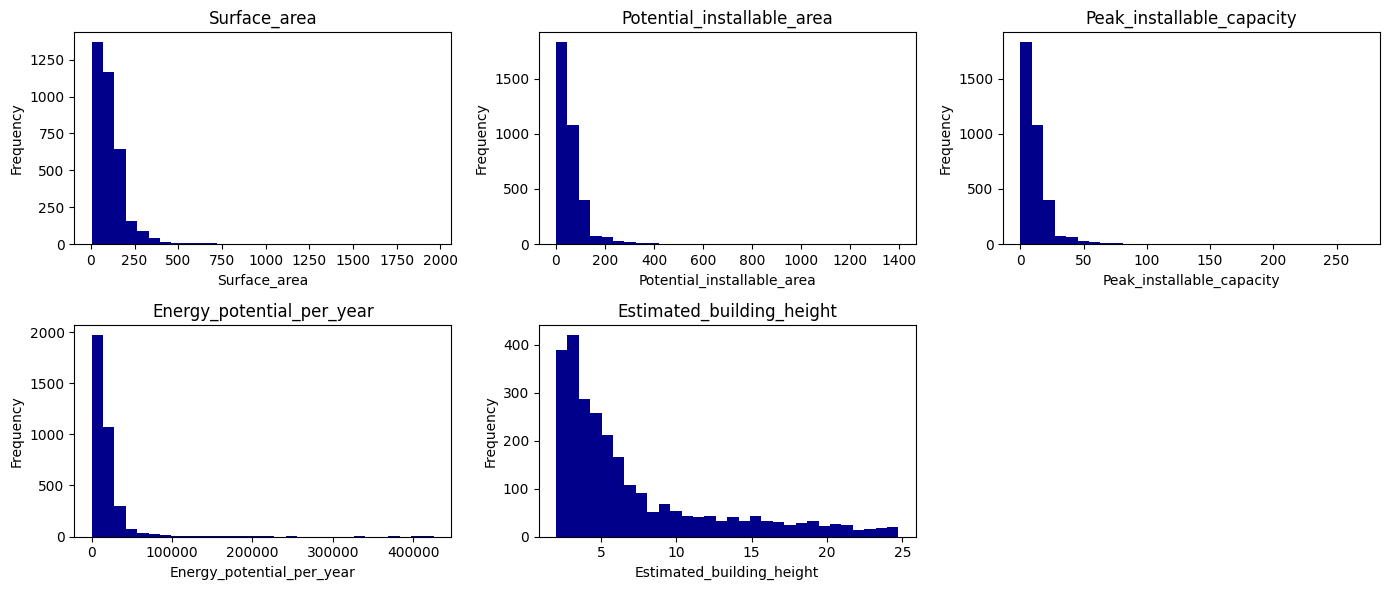

In [11]:
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='hist', bins=30, color='darkblue', title=col)
    axes[i].set_xlabel(col)
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

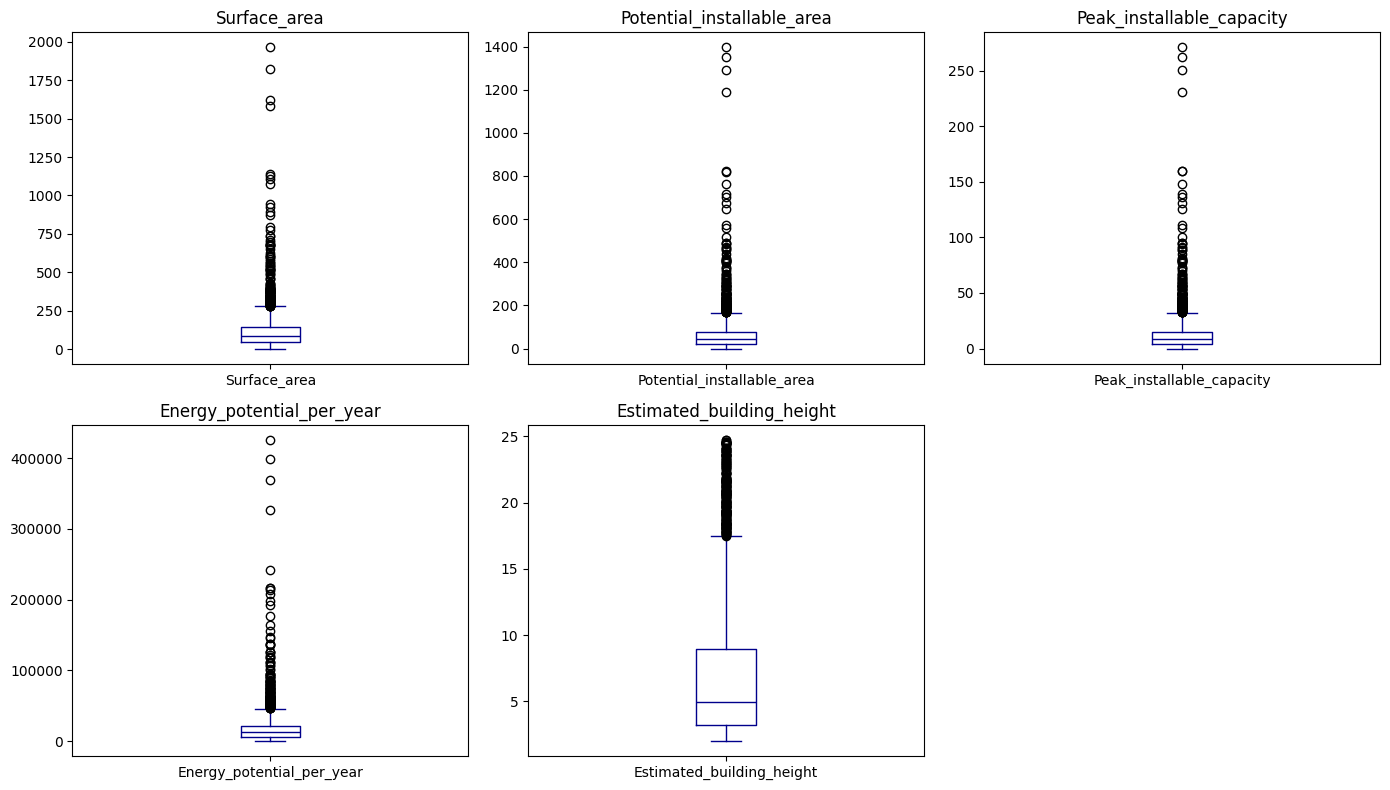

In [12]:
cols = [
    'Surface_area',
    'Potential_installable_area',
    'Peak_installable_capacity',
    'Energy_potential_per_year',
    'Estimated_building_height'
]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].plot(ax=axes[i], kind='box', color='darkblue', title=col)
 
    

# Hide the unused subplot (since you have 5 columns)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [13]:
(df == 0).sum()
#This means that eventhough there is surface_area but the potential installable area is 0. Then the surface couldn't be installed.

City                           0
Surface_area                   0
Potential_installable_area    44
Peak_installable_capacity     44
Energy_potential_per_year     44
Assumed_building_type          0
Estimated_tilt                 7
Estimated_building_height      0
Estimated_capacity_factor      0
dtype: int64

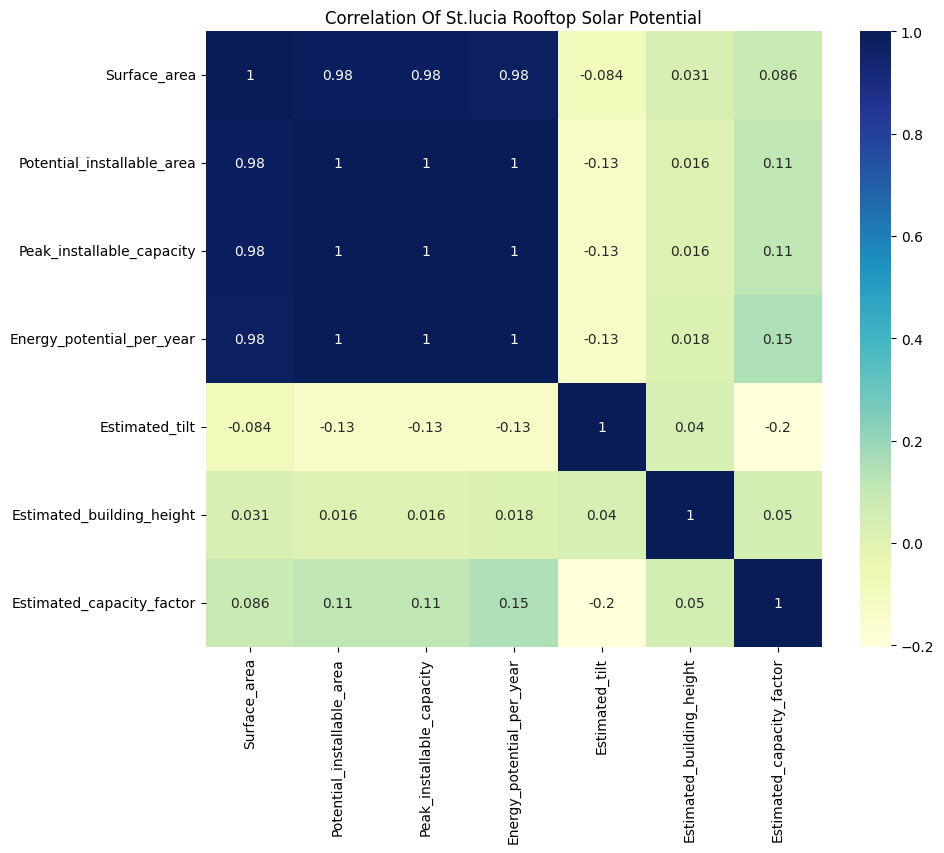

In [14]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()

In [15]:
#Let's see why the value of Peak_installable_capacity and Energy_potential_per_year has correlation 1
df[df['Peak_installable_capacity'] == df['Energy_potential_per_year']]

,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor
64,StLucia,40.709999,0.0,0.0,0.0,Single-family residential,33.450001,NaN,NaN
106,StLucia,24.830000,0.0,0.0,0.0,Single-family residential,21.620001,18.95,NaN
148,StLucia,20.040001,0.0,0.0,0.0,Single-family residential,22.950001,12.45,NaN
379,StLucia,10.760000,0.0,0.0,0.0,Single-family residential,20.990000,NaN,NaN
403,StLucia,16.950001,0.0,0.0,0.0,Single-family residential,21.170000,3.82,NaN
463,StLucia,3.630000,0.0,0.0,0.0,Single-family residential,0.000000,4.40,NaN
519,StLucia,15.000000,0.0,0.0,0.0,Single-family residential,22.840000,6.67,NaN
538,StLucia,10.970000,0.0,0.0,0.0,Single-family residential,18.950001,NaN,NaN
629,StLucia,18.920000,0.0,0.0,0.0,Single-family residential,22.209999,3.57,NaN
699,StLucia,5.000000,0.0,0.0,0.0,Single-family residential,0.000000,9.35,NaN


In [18]:
#We notice that the value Peak_installable_capacity	and nergy_potential_per_year both contains zero. Let's remove rows that contains zero from each columns 
df = df.loc[(df != 0).all(axis=1)]


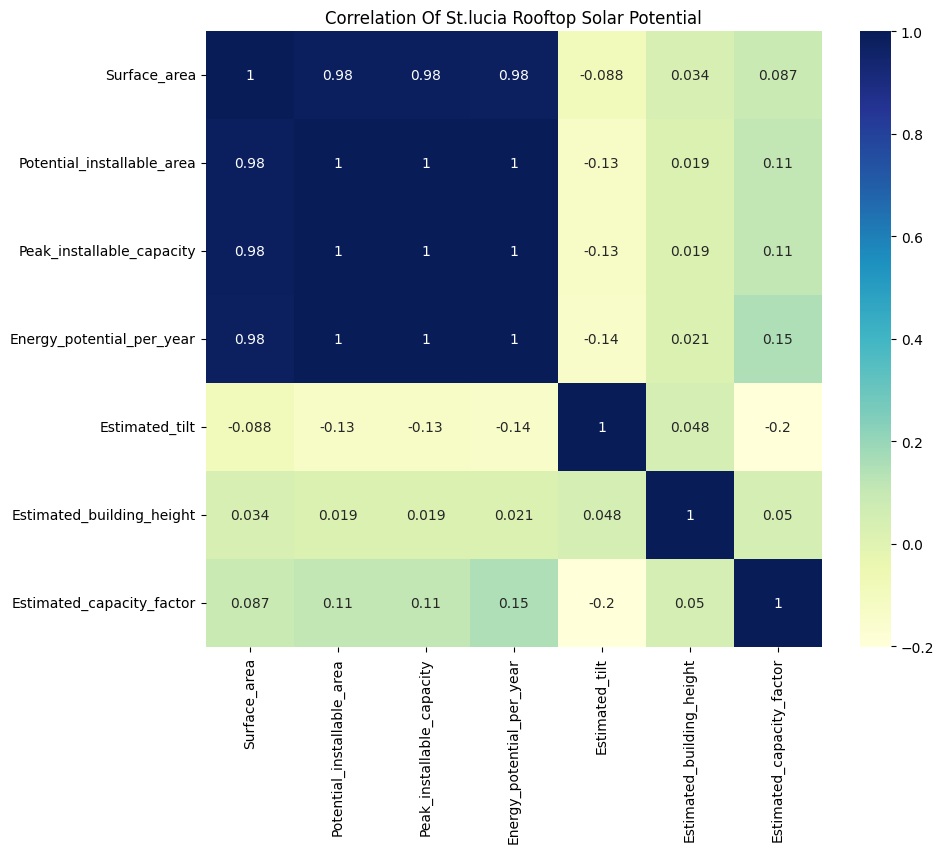

In [19]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corr, annot=True, cmap='YlGnBu', square=True)
plt.title("Correlation Of St.lucia Rooftop Solar Potential")
plt.show()